In [1]:
from PYME.recipes import modules; from PYME.LMVis import pipeline; from PYME.recipes import localisations; from PYMEcs.recipes import localisations as loc2;
from PYME.recipes import tablefilters; from PYME.recipes import tracking;
data = pipeline.Pipeline('../data/3D RyR-surface DNA-PAINT/030320_sF(ROI+fiducial).hdf') 
data.recipe.update_from_yaml('../data/3D RyR-surface DNA-PAINT/recipe to drift correct and filter 030320.yaml') 
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) 
data.selectDataSource('ROI')
co = tracking.FindClumps(inputName='ROI', output='with_clumps', outputClumps=''); data.recipe.add_module(co);
clu = localisations.MergeClumps(inputName='with_clumps', outputName='coalesced'); data.recipe.add_module(clu);
DBS = loc2.DBSCANClustering2(inputName='coalesced', outputName='dbscanClustered', minClumpSize = 3, searchRadius = 50,); data.recipe.add_module(DBS);
ids = tablefilters.FilterTable(inputName='dbscanClustered', outputName='validCluster', filters = {'dbscanClumpID' : [0.5, 185]}); data.recipe.add_module(ids);
data.recipe.execute()

Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base


c:\users\work\documents\pyme_home\python-microscopy\PYME\IO\tabular.py:48: VisibleDeprecationWarning: mappingFilter is deprecated, use MappingFilter instead
  warnings.warn(VisibleDeprecationWarning('%s is deprecated, use %s instead' % (name, cls.__name__)))
c:\users\work\documents\pyme_home\pyme-extra\PYMEcs\Analysis\trackFiducials.py:152: RuntimeWarning: Mean of empty slice
  mm = np.nanmean(meas, 0)


Available data sources: ROI, corrected_fiducials, filtered_localizations, Localizations, find_fid, fiducialApplied, fiducialAdded, colour_mapped


[]
['fitResults_z0', 'fitResults_x0', 'slicesUsed_x_step', 'startParams_bg', 'fitError_y0', 'startParams_dy', 'startParams_dx', 'resultCode', 'startParams_br', 'slicesUsed_x2_step', 'startParams_A', 'ratio', 'error_y', 'error_z', 'slicesUsed_y2_step', 'fitResults_dy', 'fitResults_br', 'slicesUsed_y_stop', 'z_raw', 'x_raw', 'startParams_x0', 'fitResults_bg', 'subtractedBackground_r', 'slicesUsed_y2_stop', 'A', 'startParams_z0', 'fitError_A', 'fitResults_y0', 'nchi2', 'fiducial_x', 'fiducial_y', 'slicesUsed_y_step', 'focus', 'slicesUsed_x_start', 'slicesUsed_x2_stop', 'fitError_x0', 'fitError_z0', 'fitError_br', 'error_x', 'fitError_dy', 'fitResults_A', 'tIndex', 'subtractedBackground_g', 'fitError_bg', 'slicesUsed_x2_start', 'drifty', 'driftx', 'driftz', 'slicesUsed_x_stop', 'y_raw', 'slicesUsed_y2_start', 't', 'fitResults_dx', 'y', 'x', 'fitError_dx', 'z', 'startParams_y0', 'slicesUsed_y_start']
Created colour filter with chans: ['block0', 'block1']
res-1/7     = 33.1 nm


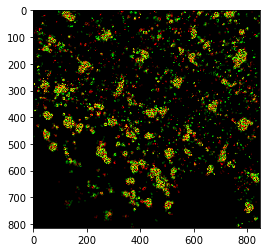

In [2]:
tb = localisations.TimeBlocks(input='ROI',output='tbROI', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbROI', jitterVariable="error_x",outputImage="FRCROI",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCROI']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCROI'];FRC_entire_ROI.data.shape

rgbim = rgbwrap(FRC_entire_ROI.data[:,:,0,0].squeeze(),FRC_entire_ROI.data[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)

[]
['dbscanClumpID', 'fitResults_z0', 'fitResults_x0', 'clumpSize', 'focus', 'startParams_bg', 'startParams_dy', 'startParams_dx', 'resultCode', 'startParams_br', 'startParams_A', 'ratio', 'error_y', 'error_z', 'fitResults_dy', 'fitResults_br', 'trackVelocity', 'z_raw', 'x_raw', 'startParams_x0', 'fitResults_bg', 'fiducial_x', 'A', 'clumpIndex', 'fitResults_y0', 'nchi2', 'subtractedBackground_r', 'fiducial_y', 'error_x', 'fitResults_A', 'tIndex', 'subtractedBackground_g', 'startParams_z0', 'drifty', 'driftx', 'driftz', 'y_raw', 't', 'fitResults_dx', 'y', 'x', 'z', 'startParams_y0']
Created colour filter with chans: ['block0', 'block1']
res-1/7     = 37.0 nm


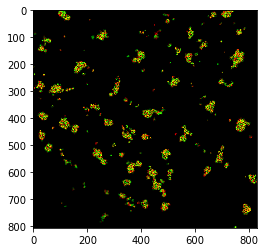

In [3]:
data.selectDataSource('validCluster')
tb = localisations.TimeBlocks(input='validCluster',output='tbvalidCluster', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbvalidCluster', 
                                  jitterVariable="error_x",outputImage="FRCvalidCluster",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCvalidCluster']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCvalidCluster'];FRC_entire_ROI.data.shape

rgbim = rgbwrap(FRC_entire_ROI.data[:,:,0,0].squeeze(),FRC_entire_ROI.data[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)